Davin Edbert Santoso Halim
/ 2602067086

In [ ]:
# DAVIN EDBERT SANTOSO HALIM | 2602067086

import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
aapl_df = pd.read_csv('AAPL.csv')
amd_df = pd.read_csv('AMD.csv')

In [ ]:
print("AAPL")
print(aapl_df.head())
print('_'*75)
print("AMD")
print(amd_df.head())

AAPL
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400
___________________________________________________________________________
AMD
         Date  Open      High       Low     Close  Adj Close  Volume
0  1980-03-17   0.0  3.302083  3.125000  3.145833   3.145833  219600
1  1980-03-18   0.0  3.125000  2.937500  3.031250   3.031250  727200
2  1980-03-19   0.0  3.083333  3.020833  3.041667   3.041667  295200
3  1980-03-20   0.0  3.062500  3.010417  3.010417   3.010417  159600
4  1980-03-21   0.0  3.020833  2.906250  2.916667   2.916667  130800


In [ ]:
print("AAPL")
print("Columns: ", aapl_df.columns)
print("Shape: ", aapl_df.shape)
print('_'*75)
print("AMD")
print("Columns: ", amd_df.columns)
print("Shape: ", amd_df.shape)

AAPL
Columns:  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Shape:  (9909, 7)
___________________________________________________________________________
AMD
Columns:  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Shape:  (10098, 7)


In [ ]:
# Parsing and set date column to index
aapl_df = pd.read_csv('AAPL.csv',
                 parse_dates=["Date"],
                 index_col=["Date"])
amd_df = pd.read_csv('AMD.csv',
                 parse_dates=["Date"],
                 index_col=["Date"])

parse_dates(parsing) penting memastikan bahwa kolom tanggal diparsing sebagai tipe datetime dan diatur sebagai indeks dari DataFrame. Ini sangat penting untuk data time series. Dengan cara ini, kita dapat melakukan analisis dan manipulasi data berbasis waktu secara efisien dan akurat.

In [ ]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
amd_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [ ]:
print(aapl_df.info())
print('_'*50)
print(amd_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9 KB
None
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dty

In [ ]:
# Select relevant columns
aapl_df_close = pd.DataFrame(aapl_df['Close'])
amd_df_close = pd.DataFrame(amd_df['Close'])

Menggunakan Kolom Date dan Close saja yang menjadi informasi paling penting pada dataset ini.

In [ ]:
aapl_df_close.head()

,Close
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


In [ ]:
amd_df_close.head()

,Close
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667


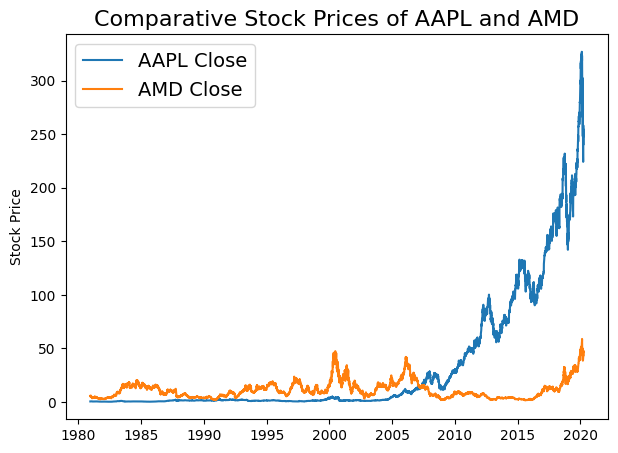

In [ ]:
import matplotlib.pyplot as plt
# Menggabungkan kedua data penutupan dengan mengindeks ulang berdasarkan tanggal
combined_close = pd.DataFrame()
combined_close['AAPL Close'] = aapl_df_close['Close']
combined_close['AMD Close'] = amd_df_close['Close']

# Membuat plot
plt.figure(figsize=(7, 5))
plt.plot(combined_close.index, combined_close['AAPL Close'], label='AAPL Close')
plt.plot(combined_close.index, combined_close['AMD Close'], label='AMD Close')
plt.ylabel("Stock Price")
plt.title("Comparative Stock Prices of AAPL and AMD", fontsize=16)
plt.legend(fontsize=14)
plt.show()

**Tren:**

- Harga saham AAPL (ditunjukkan dengan garis biru) menunjukkan tren peningkatan yang signifikan, terutama setelah tahun 2005. Peningkatan ini semakin tajam setelah tahun 2010, mencapai puncak di sekitar tahun 2020.
- Harga saham AMD (ditunjukkan dengan garis oranye) juga menunjukkan peningkatan, tetapi dengan volatilitas yang lebih tinggi dan peningkatan yang lebih moderat dibandingkan AAPL. Ada beberapa puncak volatilitas yang signifikan, terutama di sekitar tahun 2000 dan pertengahan 2010-an.

**Perbandingan Antara AAPL dan AMD:**
- Secara keseluruhan, harga saham AAPL mengalami peningkatan yang lebih tajam dan stabil dibandingkan dengan harga saham AMD selama periode yang ditampilkan.
- Meskipun AMD menunjukkan beberapa periode peningkatan yang signifikan, fluktuasi harga sahamnya lebih terlihat dibandingkan dengan AAPL.

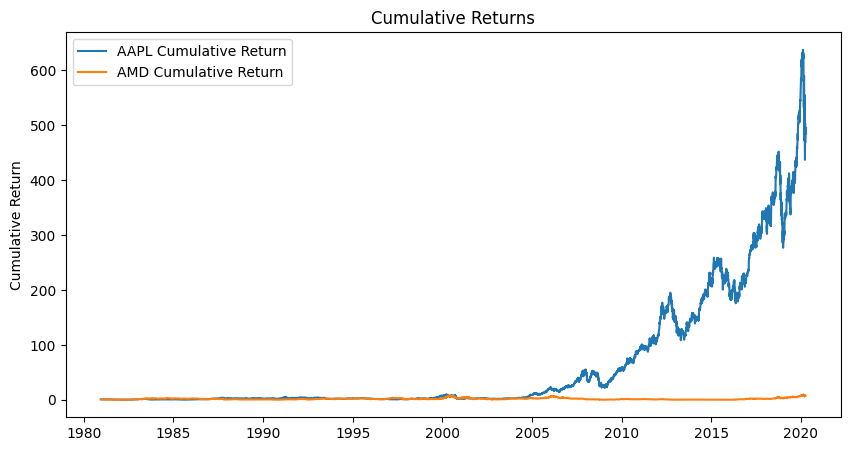

In [ ]:
# Calculate Daily Returns
combined_close['AAPL Daily Return'] = combined_close['AAPL Close'].pct_change()
combined_close['AMD Daily Return'] = combined_close['AMD Close'].pct_change()

# Calculate Cumulative Returns
combined_close['AAPL Cumulative Return'] = (1 + combined_close['AAPL Daily Return']).cumprod()
combined_close['AMD Cumulative Return'] = (1 + combined_close['AMD Daily Return']).cumprod()

# Plot Cumulative Returns
plt.figure(figsize=(10, 5))
plt.plot(combined_close.index, combined_close['AAPL Cumulative Return'], label='AAPL Cumulative Return')
plt.plot(combined_close.index, combined_close['AMD Cumulative Return'], label='AMD Cumulative Return')
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns")
plt.legend()
plt.show()

- **(Daily Return)** adalah persentase perubahan harga penutupan saham dari satu hari ke hari berikutnya. Ini adalah cara untuk mengukur kinerja harian dari saham. Daily Return memberikan gambaran tentang seberapa besar nilai saham naik atau turun setiap harinya.
- **(Cumulative Return)** adalah total pengembalian investasi yang diperoleh selama periode waktu tertentu. Ini menunjukkan seberapa besar investasi telah tumbuh atau menyusut dari awal periode hingga akhir periode dengan menggabungkan daily return secara berurutan.

Plot ini menunjukkan bagaimana investasi di AAPL dan AMD telah tumbuh seiring waktu.
- Pertumbuhan Seiring Waktu: Kecuraman kurva menunjukkan tingkat pertumbuhan. Kurva AAPL jauh lebih curam, menunjukkan pengembalian kumulatif yang jauh lebih tinggi dibandingkan dengan AMD.
- Nilai Investasi: Nilai pengembalian kumulatif di akhir plot menunjukkan total pengembalian investasi. Misalnya, jika pengembalian kumulatif adalah 600, itu berarti investasi awal sebesar $$1 akan tumbuh menjadi $600.

In [ ]:
print("AAPL")
aapl_time_step = aapl_df_close.index.to_numpy()
aapl_close = aapl_df_close['Close'].to_numpy()
print(aapl_time_step[:5])
print(aapl_close[:5])

AAPL
['1980-12-12T00:00:00.000000000' '1980-12-15T00:00:00.000000000'
 '1980-12-16T00:00:00.000000000' '1980-12-17T00:00:00.000000000'
 '1980-12-18T00:00:00.000000000']
[0.51339287 0.48660713 0.45089287 0.46205357 0.47544643]


In [ ]:
print("AMD")
amd_time_step = amd_df_close.index.to_numpy()
amd_close = amd_df_close['Close'].to_numpy()
print(amd_time_step[:5])
print(amd_close[:5])

AMD
['1980-03-17T00:00:00.000000000' '1980-03-18T00:00:00.000000000'
 '1980-03-19T00:00:00.000000000' '1980-03-20T00:00:00.000000000'
 '1980-03-21T00:00:00.000000000']
[3.14583325 3.03125    3.04166675 3.01041675 2.91666675]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

aapl_close = scaler.fit_transform(aapl_close.reshape(-1, 1))
amd_close = scaler.fit_transform(amd_close.reshape(-1, 1))

## WINDOW

In [ ]:
window_size = 5
horizon = 1

Fungsi utamanya adalah untuk menghaluskan fluktuasi data (rata-rata bergerak) dan untuk memprediksi nilai masa depan berdasarkan pola dalam jendela data terbaru (prediksi time series).Dengan kriteria window_size = 5 dan horizon = 1, artinya setiap kali kita menghitung statistik atau membuat prediksi, kita menggunakan 5 data titik terakhir (window) dan membuat prediksi untuk 1 periode waktu ke depan (horizon).

In [ ]:
import numpy as np

def windowed_dataset(series, window_size, horizon):
    features = []
    labels = []

    for i in range(len(series) - window_size - horizon + 1):
        features.append(series[i:(i + window_size)])
        labels.append(series[i + window_size:i + window_size + horizon])

    return np.array(features), np.array(labels)

### AAPL

In [ ]:
aapl_x, aapl_y = windowed_dataset(aapl_close, window_size, horizon)

In [ ]:
aapl_x, aapl_y

(array([[[9.69299159e-04],
         [8.87386505e-04],
         [7.78169755e-04],
         [8.12299966e-04],
         [8.53256293e-04]],
 
        [[8.87386505e-04],
         [7.78169755e-04],
         [8.12299966e-04],
         [8.53256293e-04],
         [9.41994880e-04]],
 
        [[7.78169755e-04],
         [8.12299966e-04],
         [8.53256293e-04],
         [9.41994880e-04],
         [1.01708151e-03]],
 
        ...,
 
        [[6.85538562e-01],
         [7.54375758e-01],
         [7.50216780e-01],
         [7.89727045e-01],
         [7.57005701e-01]],
 
        [[7.54375758e-01],
         [7.50216780e-01],
         [7.89727045e-01],
         [7.57005701e-01],
         [7.78626234e-01]],
 
        [[7.50216780e-01],
         [7.89727045e-01],
         [7.57005701e-01],
         [7.78626234e-01],
         [7.77036025e-01]]]),
 array([[[0.00094199]],
 
        [[0.00101708]],
 
        [[0.00108534]],
 
        ...,
 
        [[0.77862623]],
 
        [[0.77703602]],
 
        [[0.

In [ ]:
len(aapl_x), len(aapl_y)

(9904, 9904)

In [ ]:
# Menampilkan beberapa sampel pertama dari features dan labels
for i in range(3):
    print("Feature set ke-{}: {}".format(i+1, aapl_x[i]))
    print("Label set ke-{}: {}\n".format(i+1, aapl_y[i]))

Feature set ke-1: [[0.0009693 ]
 [0.00088739]
 [0.00077817]
 [0.0008123 ]
 [0.00085326]]
Label set ke-1: [[0.00094199]]

Feature set ke-2: [[0.00088739]
 [0.00077817]
 [0.0008123 ]
 [0.00085326]
 [0.00094199]]
Label set ke-2: [[0.00101708]]

Feature set ke-3: [[0.00077817]
 [0.0008123 ]
 [0.00085326]
 [0.00094199]
 [0.00101708]]
Label set ke-3: [[0.00108534]]



In [ ]:
aapl_close[:6]

array([[0.0009693 ],
       [0.00088739],
       [0.00077817],
       [0.0008123 ],
       [0.00085326],
       [0.00094199]])

In [ ]:
aapl_close[1:7]

array([[0.00088739],
       [0.00077817],
       [0.0008123 ],
       [0.00085326],
       [0.00094199],
       [0.00101708]])

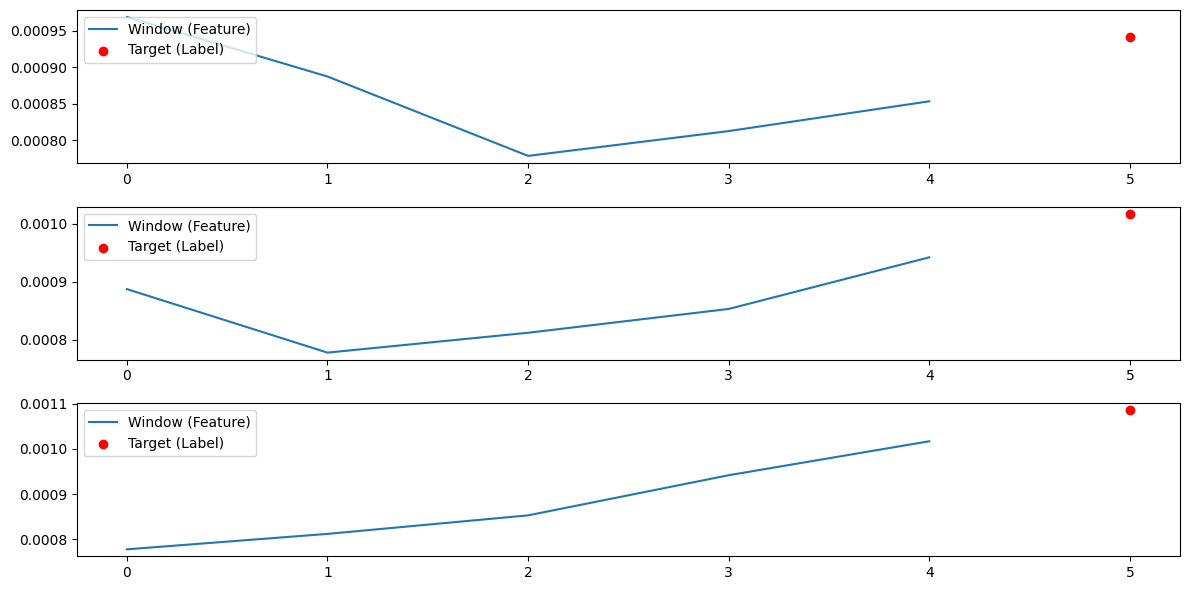

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(aapl_x[i], label='Window (Feature)')
    plt.scatter(len(aapl_x[i]), aapl_y[i], color='red', label='Target (Label)')
    plt.legend(loc='upper left')
    plt.tight_layout()

plt.show()

1. **Tren Data dalam Window:** Menunjukkan variasi tren dalam window (naik, turun, atau datar), yang mungkin membuat prediksi lebih sulit karena model harus belajar berbagai pola.

2. **Jarak Target dari Window:** Target (titik merah) seringkali cukup jauh dari nilai terakhir dalam window, yang dapat menantang model dalam membuat prediksi yang akurat.

### AMD

In [ ]:
amd_x, amd_y = windowed_dataset(amd_close, window_size, horizon)

In [ ]:
amd_x, amd_y

(array([[[0.02663815],
         [0.02463774],
         [0.0248196 ],
         [0.02427403],
         [0.02263734]],
 
        [[0.02463774],
         [0.0248196 ],
         [0.02427403],
         [0.02263734],
         [0.01827281]],
 
        [[0.0248196 ],
         [0.02427403],
         [0.02263734],
         [0.01827281],
         [0.01718168]],
 
        ...,
 
        [[0.69867316],
         [0.77863129],
         [0.7508729 ],
         [0.80097763],
         [0.78491621]],
 
        [[0.77863129],
         [0.7508729 ],
         [0.80097763],
         [0.78491621],
         [0.80726256]],
 
        [[0.7508729 ],
         [0.80097763],
         [0.78491621],
         [0.80726256],
         [0.76571226]]]),
 array([[[0.01827281]],
 
        [[0.01718168]],
 
        [[0.01445385]],
 
        ...,
 
        [[0.80726256]],
 
        [[0.76571226]],
 
        [[0.73393853]]]))

In [ ]:
len(amd_x), len(amd_y)

(10093, 10093)

In [ ]:
# Menampilkan beberapa sampel pertama dari features dan labels
for i in range(3):
    print("Feature set ke-{}: {}".format(i+1, amd_x[i]))
    print("Label set ke-{}: {}\n".format(i+1, amd_y[i]))

Feature set ke-1: [[0.02663815]
 [0.02463774]
 [0.0248196 ]
 [0.02427403]
 [0.02263734]]
Label set ke-1: [[0.01827281]]

Feature set ke-2: [[0.02463774]
 [0.0248196 ]
 [0.02427403]
 [0.02263734]
 [0.01827281]]
Label set ke-2: [[0.01718168]]

Feature set ke-3: [[0.0248196 ]
 [0.02427403]
 [0.02263734]
 [0.01827281]
 [0.01718168]]
Label set ke-3: [[0.01445385]]



In [ ]:
amd_close[:6]

array([[0.02663815],
       [0.02463774],
       [0.0248196 ],
       [0.02427403],
       [0.02263734],
       [0.01827281]])

In [ ]:
amd_close[1:7]

array([[0.02463774],
       [0.0248196 ],
       [0.02427403],
       [0.02263734],
       [0.01827281],
       [0.01718168]])

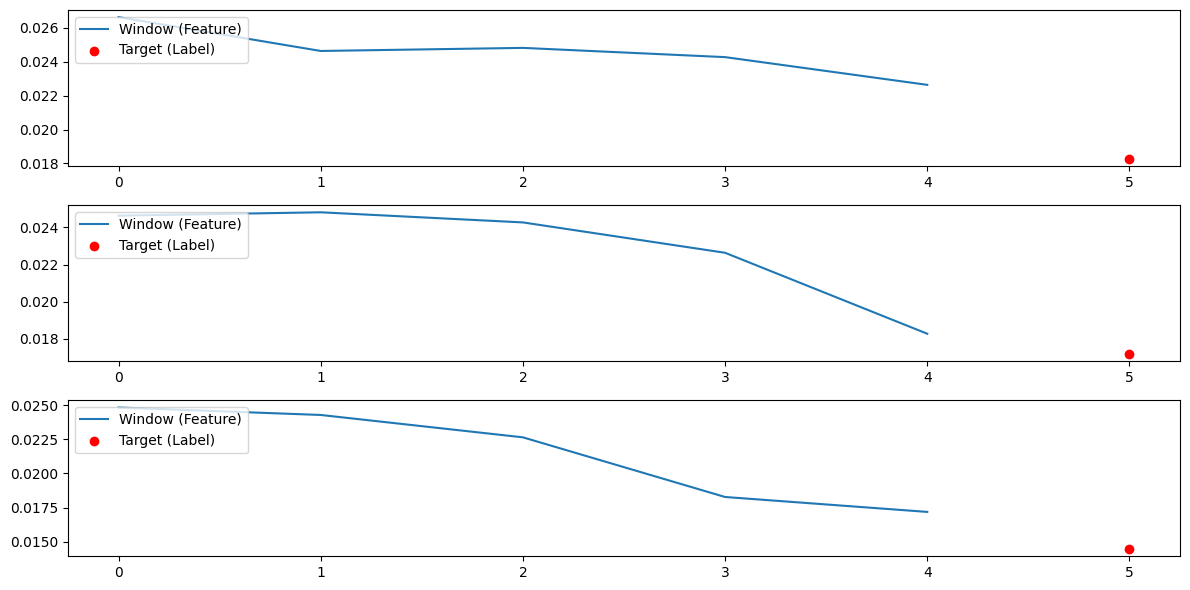

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(amd_x[i], label='Window (Feature)')
    plt.scatter(len(amd_x[i]), amd_y[i], color='red', label='Target (Label)')
    plt.legend(loc='upper left')
    plt.tight_layout()

plt.show()

1. **Tren Data dalam Window:** Menunjukkan tren menurun yang lebih konsisten, yang mungkin lebih mudah bagi model untuk diprediksi karena pola yang lebih seragam.

2. **Jarak Target dari Window:** Target (titik merah) lebih dekat dengan nilai terakhir dalam window, yang dapat mempermudah model dalam membuat prediksi yang akurat.

**Kesimpulan:**
- Grafik AMD menunjukkan tren yang lebih konsisten dan target yang lebih dekat dengan nilai terakhir dalam window, yang bisa berarti model lebih mudah dalam membuat prediksi dibandingkan dengan grafik AAPL yang memiliki variasi tren dan jarak target yang lebih jauh.
- Data AMD mungkin lebih mudah untuk diprediksi oleh model karena pola yang lebih seragam dan target yang lebih dekat dengan window, sementara data AAPL memerlukan model untuk belajar berbagai pola yang lebih kompleks.

## SPLITTING

In [ ]:
def split_data(features, labels, train_size, val_size):
    total_size = len(features)
    train_end = int(train_size * total_size)
    val_end = train_end + int(val_size * total_size)

    xtrain = features[:train_end]
    ytrain = labels[:train_end]
    xval = features[train_end:val_end]
    yval = labels[train_end:val_end]
    xtest = features[val_end:]
    ytest = labels[val_end:]

    return xtrain, ytrain, xval, yval, xtest, ytest

Dalam data time series, pembagian dataset harus mempertahankan urutan waktu untuk mencerminkan sifat sekuensial data. Splitting dengan format 80% untuk pelatihan, 10% untuk validasi, dan 10% untuk pengujian dilakukan dengan mengambil bagian pertama 80% dari data sebagai training set, bagian berikutnya 10% sebagai validation set, dan bagian terakhir 10% sebagai testing set. Pendekatan ini memastikan bahwa model dilatih dan divalidasi pada data yang merefleksikan urutan temporal yang benar, sehingga meningkatkan keakuratan prediksi pada data masa depan.

### AAPL

In [ ]:
aapl_xtrain, aapl_ytrain, aapl_xval, aapl_yval, aapl_xtest, aapl_ytest = split_data(aapl_x, aapl_y, 0.8, 0.1)

print(f"""_AAPL_
xtrain: {len(aapl_xtrain)}
ytrain: {len(aapl_ytrain)}
xval: {len(aapl_xval)}
yval: {len(aapl_yval)}
xtest: {len(aapl_xtest)}
ytest: {len(aapl_ytest)}""")

_AAPL_
xtrain: 7923
ytrain: 7923
xval: 990
yval: 990
xtest: 991
ytest: 991


In [ ]:
# Checking Based on Dates
train_dates = aapl_time_step[:len(aapl_xtrain)]
val_dates = aapl_time_step[len(aapl_xtrain):(len(aapl_xtrain) + len(aapl_xval))]
test_dates = aapl_time_step[-len(aapl_xtest):]

# Print the date ranges for each dataset
print(f"""Training Dates:
First Date: {train_dates[0]}
Last Date: {train_dates[-1]}

Validation Dates:
First Date: {val_dates[0]}
Last Date: {val_dates[-1]}

Testing Dates:
First Date: {test_dates[0]}
Last Date: {test_dates[-1]}""")

Training Dates:
First Date: 1980-12-12T00:00:00.000000000
Last Date: 2012-05-09T00:00:00.000000000

Validation Dates:
First Date: 2012-05-10T00:00:00.000000000
Last Date: 2016-04-18T00:00:00.000000000

Testing Dates:
First Date: 2016-04-26T00:00:00.000000000
Last Date: 2020-04-01T00:00:00.000000000


### AMD

In [ ]:
amd_xtrain, amd_ytrain, amd_xval, amd_yval, amd_xtest, amd_ytest = split_data(amd_x, amd_y, 0.8, 0.1)

print(f"""_AMD_
xtrain: {len(amd_xtrain)}
ytrain: {len(amd_ytrain)}
xval: {len(amd_xval)}
yval: {len(amd_yval)}
xtest: {len(amd_xtest)}
ytest: {len(amd_ytest)}""")

_AMD_
xtrain: 8074
ytrain: 8074
xval: 1009
yval: 1009
xtest: 1010
ytest: 1010


In [ ]:
# Checking Based on Dates
train_dates = amd_time_step[:len(amd_xtrain)]
val_dates = amd_time_step[len(amd_xtrain):(len(amd_xtrain) + len(amd_xval))]
test_dates = amd_time_step[-len(amd_xtest):]

# Print the date ranges for each dataset
print(f"""Training Dates:
First Date: {train_dates[0]}
Last Date: {train_dates[-1]}

Validation Dates:
First Date: {val_dates[0]}
Last Date: {val_dates[-1]}

Testing Dates:
First Date: {test_dates[0]}
Last Date: {test_dates[-1]}""")

Training Dates:
First Date: 1980-03-17T00:00:00.000000000
Last Date: 2012-03-15T00:00:00.000000000

Validation Dates:
First Date: 2012-03-16T00:00:00.000000000
Last Date: 2016-03-21T00:00:00.000000000

Testing Dates:
First Date: 2016-03-30T00:00:00.000000000
Last Date: 2020-04-01T00:00:00.000000000


# MODEL (LSTM)

Menggunakan model LSTM (Long Short-Term Memory) sangat efektif untuk data time series karena kemampuannya menangani ketergantungan jangka panjang dan pendek secara simultan. LSTM dirancang untuk mengatasi masalah vanishing gradient yang sering terjadi pada RNN tradisional, memungkinkan model untuk mengingat informasi relevan dalam jangka waktu panjang. Ini sangat berguna dalam situasi di mana pola atau tren data memiliki pengaruh jangka panjang, seperti dalam prediksi harga saham atau analisis sentimen. Selain itu, LSTM lebih robust terhadap noise dalam data dan mampu menangkap dinamika kompleks, menjadikannya pilihan ideal untuk berbagai aplikasi time series. Fleksibilitas LSTM juga memungkinkan integrasi dengan lapisan lain, seperti Convolutional Layers atau Dense Layers, untuk membentuk arsitektur yang lebih kompleks dan kuat, yang dapat disesuaikan dengan kebutuhan spesifik dari data yang digunakan.

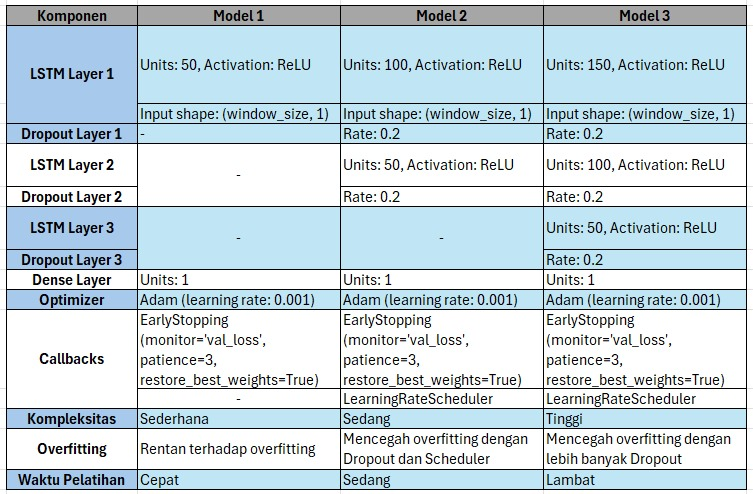

- EarlyStopping : adalah callback dalam training neural network yang digunakan untuk menghentikan training lebih awal jika performa model pada data validasi tidak meningkat setelah sejumlah epoch tertentu. Fungsi utama EarlyStopping adalah mencegah overfitting dan menghemat waktu serta sumber daya komputasi.
- Dropout : adalah teknik sederhana namun efektif untuk meningkatkan performa neural network dengan mencegah overfitting. Ini dicapai dengan secara acak mengabaikan sejumlah neuron selama training, memaksa jaringan untuk menjadi lebih robust dan mampu menggeneralisasi lebih baik pada data baru.
- LearningRateScheduler : digunakan untuk mengubah learning rate (tingkat pembelajaran) secara dinamis selama training model. Mengubah learning rate selama training dapat membantu dalam memperbaiki performa model, membuat training lebih stabil, dan membantu model untuk mencapai konvergensi lebih baik.

## MODEL_1

- Lapisan LSTM dengan 50 unit dan aktivasi 'relu'.
- Lapisan Dense dengan 1 unit untuk output.
- Optimizer menggunakan Adam
- Fungsi loss 'mse' (mean squared error).

Pelatihan Model:
1. Epochs: Model dilatih selama 30 epoch.
2. Batch Size: Default (32).
3. Callbacks:
- EarlyStopping: Memantau 'val_loss' dengan patience 3 dan mengembalikan bobot terbaik yang dicapai selama pelatihan.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def build_model(lr):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(window_size, 1)),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='mse')
    return model

In [ ]:
aapl_bmodel = build_model(lr=0.001)
amd_bmodel = build_model(lr=0.001)

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history_aapl = aapl_bmodel.fit(
    aapl_xtrain, aapl_ytrain,
    epochs=30,
    validation_data=(aapl_xval, aapl_yval),
    callbacks=[early_stopping]
)

Epoch 1/30
248/248 [==============================] - 4s 9ms/step - loss: 3.1071e-04 - val_loss: 0.0011
Epoch 2/30
248/248 [==============================] - 1s 5ms/step - loss: 2.6197e-06 - val_loss: 7.9581e-04
Epoch 3/30
248/248 [==============================] - 1s 4ms/step - loss: 2.5389e-06 - val_loss: 7.2878e-04
Epoch 4/30
248/248 [==============================] - 1s 4ms/step - loss: 2.3600e-06 - val_loss: 8.2922e-04
Epoch 5/30
248/248 [==============================] - 1s 4ms/step - loss: 2.6131e-06 - val_loss: 6.8831e-04
Epoch 6/30
248/248 [==============================] - 1s 4ms/step - loss: 2.6785e-06 - val_loss: 7.9745e-04
Epoch 7/30
248/248 [==============================] - 1s 4ms/step - loss: 2.7760e-06 - val_loss: 6.8425e-04
Epoch 8/30
248/248 [==============================] - 1s 5ms/step - loss: 2.6544e-06 - val_loss: 6.8250e-04
Epoch 9/30
248/248 [==============================] - 1s 4ms/step - loss: 2.5385e-06 - val_loss: 8.2628e-04
Epoch 10/30
248/248 [===========

In [ ]:
history_amd = amd_bmodel.fit(
    amd_xtrain, amd_ytrain,
    epochs=30,
    validation_data=(amd_xval, amd_yval),
    callbacks=[early_stopping]
)

Epoch 1/30
253/253 [==============================] - 3s 5ms/step - loss: 0.0035 - val_loss: 1.0474e-05
Epoch 2/30
253/253 [==============================] - 1s 4ms/step - loss: 1.9494e-04 - val_loss: 4.5191e-05
Epoch 3/30
253/253 [==============================] - 1s 5ms/step - loss: 1.8791e-04 - val_loss: 2.5048e-05
Epoch 4/30
253/253 [==============================] - 2s 7ms/step - loss: 1.8033e-04 - val_loss: 1.6216e-05


In [ ]:
# Eval AAPL with model 1
aapl_evaluation_loss = aapl_bmodel.evaluate(aapl_xtest, aapl_ytest, verbose=0)
print(f"AAPL Evaluation Loss: {aapl_evaluation_loss}")

AAPL Evaluation Loss: 0.008779711090028286


In [ ]:
# Eval AMD with model 1
amd_evaluation_loss = amd_bmodel.evaluate(amd_xtest, amd_ytest, verbose=0)
print(f"AMD Evaluation Loss: {amd_evaluation_loss}")

AMD Evaluation Loss: 0.0005575791583396494


## MODEL_2 FINE TUNING

Learning Rate Scheduler:
- Fungsi Scheduler: Mengurangi learning rate secara eksponensial setelah epoch ke-10.
- Implementasi: Learning rate scheduler digunakan sebagai callback dalam pelatihan untuk menyesuaikan learning rate selama proses pelatihan.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
# Fungsi yang mengurangi lr seiring waktu
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

Lapisan LSTM:
1. LSTM Layer 1:
- 100 unit, aktivasi 'relu', input shape (window_size, 1), dan return_sequences=True.
- Dropout: Dropout rate 0.2 setelah LSTM layer pertama.
2. LSTM Layer 2:
- 50 unit, aktivasi 'relu'.
- Dropout: Dropout rate 0.2 setelah LSTM layer kedua.
3. Lapisan Dense: Tetap sama, dengan 1 unit untuk output.

- Optimizer menggunakan Adam


Pelatihan Model:
1. Epochs: Model dilatih selama 30 epoch.
2. Batch Size: Default (32).
3. Callbacks:
- EarlyStopping: Memantau 'val_loss' dengan patience 3 dan mengembalikan bobot terbaik yang dicapai selama pelatihan.
- Learning Rate Scheduler: Menyesuaikan learning rate selama pelatihan.

Dari model pertama ke model yang dituning, saya menambahkan learning rate scheduler, meningkatkan kompleksitas dengan menambah lapisan LSTM dan Dropout, serta mempertahankan penggunaan early stopping. Perubahan ini bertujuan untuk meningkatkan kapasitas model dalam menangkap pola yang lebih kompleks, mencegah overfitting, dan menyesuaikan learning rate selama pelatihan untuk mencapai konvergensi yang lebih baik.

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
def build_model_tuned(lr):
    model = Sequential([
        LSTM(100, activation='relu', input_shape=(window_size, 1), return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [ ]:
aapl_ftmodel = build_model_tuned(lr=0.001)
amd_ftmodel = build_model_tuned(lr=0.001)

In [ ]:
history_aapl_2 = aapl_ftmodel.fit(
    aapl_xtrain, aapl_ytrain,
    epochs=30,
    validation_data=(aapl_xval, aapl_yval),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/30
248/248 [==============================] - 6s 12ms/step - loss: 2.1035e-04 - val_loss: 0.0016 - lr: 0.0010
Epoch 2/30
248/248 [==============================] - 3s 13ms/step - loss: 4.8945e-05 - val_loss: 5.3956e-04 - lr: 0.0010
Epoch 3/30
248/248 [==============================] - 2s 9ms/step - loss: 4.5792e-05 - val_loss: 7.7261e-04 - lr: 0.0010
Epoch 4/30
248/248 [==============================] - 2s 9ms/step - loss: 4.6150e-05 - val_loss: 9.5905e-05 - lr: 0.0010
Epoch 5/30
248/248 [==============================] - 2s 9ms/step - loss: 4.4789e-05 - val_loss: 6.0666e-05 - lr: 0.0010
Epoch 6/30
248/248 [==============================] - 2s 9ms/step - loss: 4.3304e-05 - val_loss: 1.4613e-04 - lr: 0.0010
Epoch 7/30
248/248 [==============================] - 4s 14ms/step - loss: 4.8368e-05 - val_loss: 6.0604e-05 - lr: 0.0010
Epoch 8/30
248/248 [==============================] - 2s 10ms/step - loss: 4.2792e-05 - val_loss: 1.0875e-04 - lr: 0.0010
Epoch 9/30
248/248 [============

In [ ]:
history_amd_2 = amd_ftmodel.fit(
    amd_xtrain, amd_ytrain,
    epochs=30,
    validation_data=(amd_xval, amd_yval),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/30
253/253 [==============================] - 7s 16ms/step - loss: 0.0040 - val_loss: 1.9131e-04 - lr: 0.0010
Epoch 2/30
253/253 [==============================] - 3s 11ms/step - loss: 8.0331e-04 - val_loss: 8.3830e-05 - lr: 0.0010
Epoch 3/30
253/253 [==============================] - 2s 9ms/step - loss: 6.4586e-04 - val_loss: 2.0880e-04 - lr: 0.0010
Epoch 4/30
253/253 [==============================] - 2s 9ms/step - loss: 6.1765e-04 - val_loss: 3.9803e-05 - lr: 0.0010
Epoch 5/30
253/253 [==============================] - 2s 9ms/step - loss: 5.7672e-04 - val_loss: 5.2389e-05 - lr: 0.0010
Epoch 6/30
253/253 [==============================] - 4s 14ms/step - loss: 5.5400e-04 - val_loss: 3.5106e-05 - lr: 0.0010
Epoch 7/30
253/253 [==============================] - 2s 9ms/step - loss: 4.8507e-04 - val_loss: 3.4974e-05 - lr: 0.0010
Epoch 8/30
253/253 [==============================] - 2s 9ms/step - loss: 4.9102e-04 - val_loss: 2.3105e-05 - lr: 0.0010
Epoch 9/30
253/253 [=============

In [ ]:
# Eval AAPL with model 2
aapl_evaluation_loss_2 = aapl_ftmodel.evaluate(aapl_xtest, aapl_ytest, verbose=0)
print(f"AAPL Evaluation Loss: {aapl_evaluation_loss_2}")

AAPL Evaluation Loss: 0.0007298868149518967


In [ ]:
# Eval AMD with model 2
amd_evaluation_loss_2 = amd_ftmodel.evaluate(amd_xtest, amd_ytest, verbose=0)
print(f"AMD Evaluation Loss: {amd_evaluation_loss_2}")

AMD Evaluation Loss: 0.0003917085414286703


## MODEL_3 FINE TUNING Pt.2

Lapisan LSTM:
1. LSTM Layer 1:
- 150 unit, aktivasi 'relu', input shape (window_size, 1), dan return_sequences=True.
- Dropout: Dropout rate 0.2 setelah LSTM layer pertama.
2. LSTM Layer 2:
- 100 unit, aktivasi 'relu', dan return_sequences=True.
- Dropout: Dropout rate 0.2 setelah LSTM layer kedua.
3. LSTM Layer 3:
- 50 unit, aktivasi 'relu'.
- Dropout: Dropout rate 0.2 setelah LSTM layer ketiga.
4. Lapisan Dense: 1 unit untuk output.

- Optimizer menggunakan Adam


Pelatihan Model:
1. Epochs: Model dilatih selama 30 epoch.
2. Batch Size: 64.
3. Callbacks:
- EarlyStopping: Memantau 'val_loss' dengan patience 3 dan mengembalikan bobot terbaik yang dicapai selama pelatihan.
- Learning Rate Scheduler: Menyesuaikan learning rate selama pelatihan

In [ ]:
def build_model_3(lr):
    model = Sequential([
        LSTM(150, activation='relu', input_shape=(window_size, 1), return_sequences=True),
        Dropout(0.2),
        LSTM(100, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [ ]:
aapl_model_3 = build_model_3(lr=0.001)
amd_model_3 = build_model_3(lr=0.001)

In [ ]:
history_aapl_3 = aapl_model_3.fit(
    aapl_xtrain, aapl_ytrain,
    epochs=30,
    batch_size=64,
    validation_data=(aapl_xval, aapl_yval),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True), lr_scheduler]
)

Epoch 1/30
124/124 [==============================] - 9s 33ms/step - loss: 5.2134e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 2/30
124/124 [==============================] - 4s 29ms/step - loss: 5.0072e-05 - val_loss: 8.4124e-04 - lr: 0.0010
Epoch 3/30
124/124 [==============================] - 5s 44ms/step - loss: 4.7075e-05 - val_loss: 2.6064e-04 - lr: 0.0010
Epoch 4/30
124/124 [==============================] - 4s 29ms/step - loss: 5.3150e-05 - val_loss: 9.3281e-05 - lr: 0.0010
Epoch 5/30
124/124 [==============================] - 4s 30ms/step - loss: 3.9968e-05 - val_loss: 1.6505e-04 - lr: 0.0010
Epoch 6/30
124/124 [==============================] - 5s 43ms/step - loss: 3.5203e-05 - val_loss: 1.1121e-04 - lr: 0.0010
Epoch 7/30
124/124 [==============================] - 4s 30ms/step - loss: 4.2602e-05 - val_loss: 1.7279e-04 - lr: 0.0010


In [ ]:
history_amd_3 = amd_model_3.fit(
    amd_xtrain, amd_ytrain,
    epochs=30,
    batch_size=64,
    validation_data=(amd_xval, amd_yval),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True), lr_scheduler]
)

Epoch 1/30
127/127 [==============================] - 9s 43ms/step - loss: 0.0066 - val_loss: 3.1043e-04 - lr: 0.0010
Epoch 2/30
127/127 [==============================] - 4s 32ms/step - loss: 0.0010 - val_loss: 2.0141e-04 - lr: 0.0010
Epoch 3/30
127/127 [==============================] - 4s 29ms/step - loss: 9.4310e-04 - val_loss: 1.1846e-04 - lr: 0.0010
Epoch 4/30
127/127 [==============================] - 4s 34ms/step - loss: 8.3972e-04 - val_loss: 1.9038e-04 - lr: 0.0010
Epoch 5/30
127/127 [==============================] - 5s 38ms/step - loss: 8.9067e-04 - val_loss: 1.3580e-04 - lr: 0.0010
Epoch 6/30
127/127 [==============================] - 4s 29ms/step - loss: 7.3744e-04 - val_loss: 1.1535e-04 - lr: 0.0010
Epoch 7/30
127/127 [==============================] - 4s 29ms/step - loss: 7.7546e-04 - val_loss: 1.6947e-04 - lr: 0.0010
Epoch 8/30
127/127 [==============================] - 5s 43ms/step - loss: 7.1468e-04 - val_loss: 8.2223e-05 - lr: 0.0010
Epoch 9/30
127/127 [============

In [ ]:
# Eval AAPL with model 3
aapl_evaluation_loss_3 = aapl_model_3.evaluate(aapl_xtest, aapl_ytest, verbose=0)
print(f"AAPL Evaluation Loss : {aapl_evaluation_loss_3}")

AAPL Evaluation Loss : 0.0007284894236363471


In [ ]:
# Eval AMD with model 3
amd_evaluation_loss_3 = amd_model_3.evaluate(amd_xtest, amd_ytest, verbose=0)
print(f"AMD Evaluation Loss : {amd_evaluation_loss_3}")

AMD Evaluation Loss : 0.000559507287107408


# EVALUATION

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_side(history1, title1, history2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot untuk model 1 (AAPL)
    axes[0].plot(history1.history['loss'], label='Training Loss')
    axes[0].plot(history1.history['val_loss'], label='Validation Loss')
    axes[0].set_title(title1)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot untuk model 2 (AMD)
    axes[1].plot(history2.history['loss'], label='Training Loss')
    axes[1].plot(history2.history['val_loss'], label='Validation Loss')
    axes[1].set_title(title2)
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    plt.show()

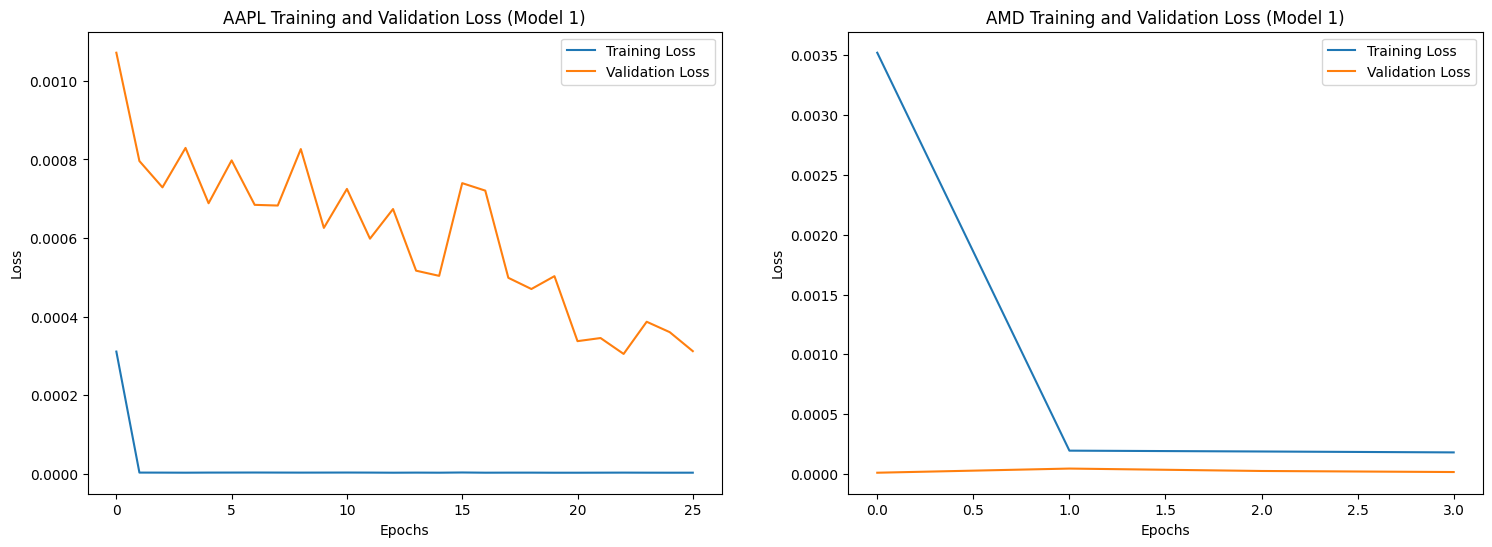

In [ ]:
plot_loss_side(history_aapl, 'AAPL Training and Validation Loss (Model 1)',
                history_amd, 'AMD Training and Validation Loss (Model 1)')

**Model 1** menunjukkan tanda-tanda overfitting yang jelas pada kedua dataset (AAPL dan AMD), dengan training loss yang sangat rendah tetapi validation loss yang lebih tinggi dan tidak stabil.

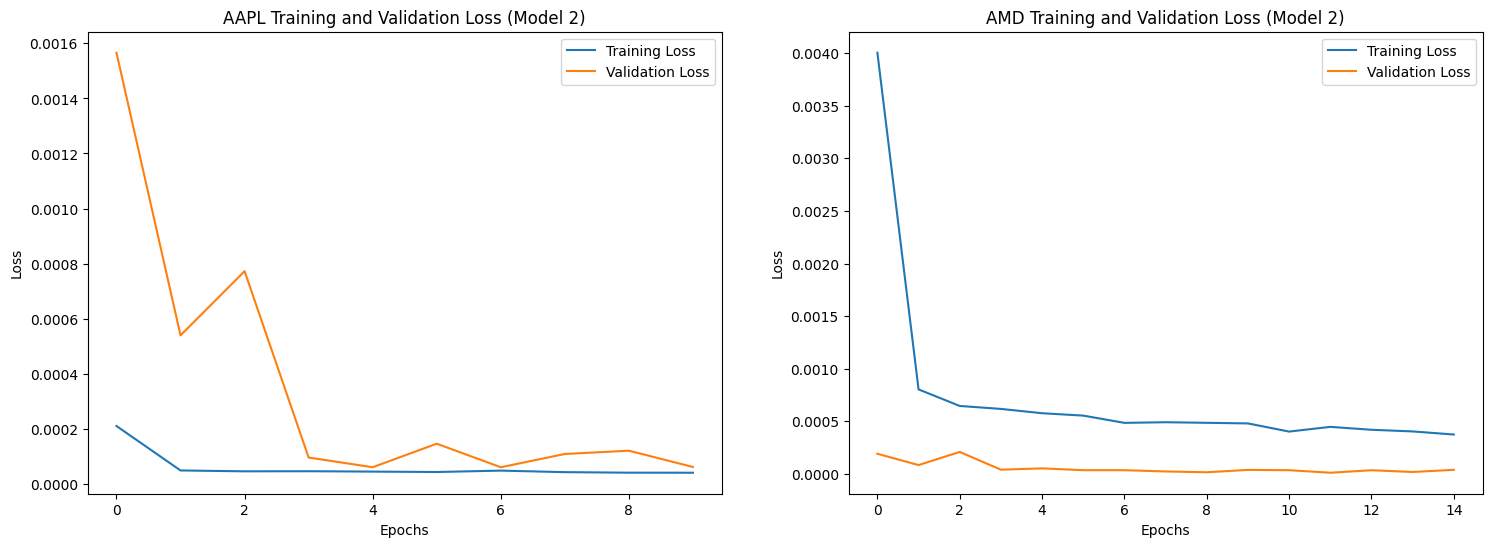

In [ ]:
plot_loss_side(history_aapl_2, 'AAPL Training and Validation Loss (Model 2)',
                history_amd_2, 'AMD Training and Validation Loss (Model 2)')

**Model 2** menunjukkan peningkatan yang signifikan dalam performa, dengan training loss dan validation loss yang lebih konsisten dan lebih rendah, menunjukkan generalisasi yang lebih baik pada data validasi.

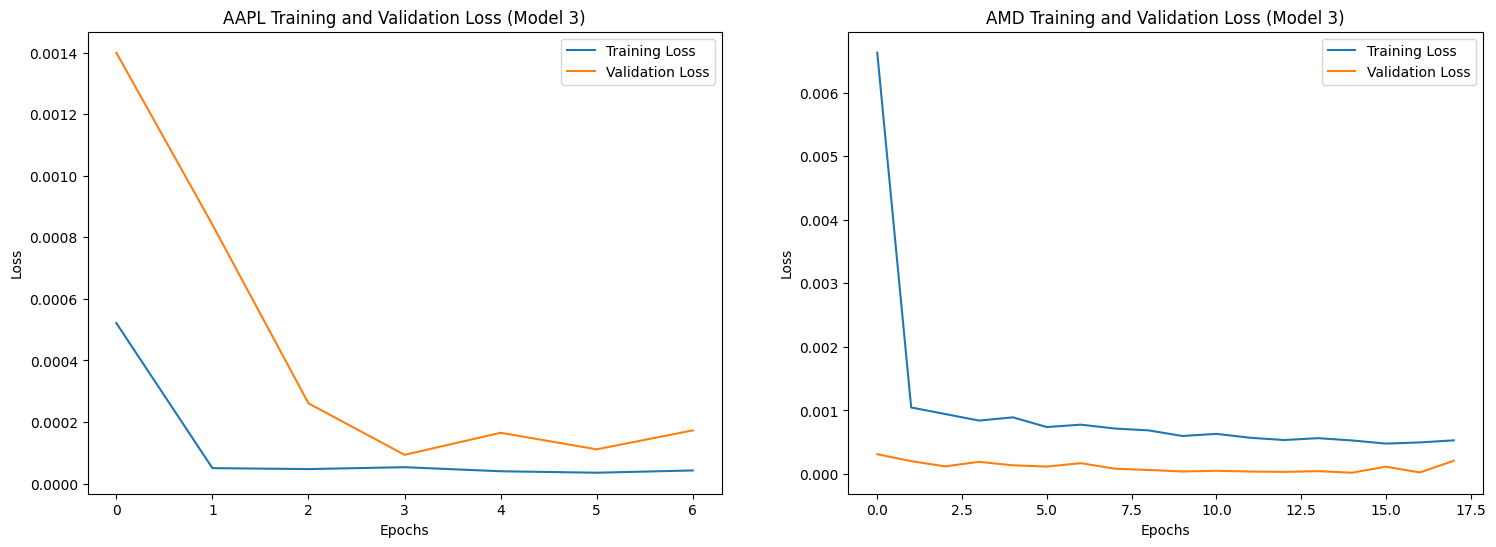

In [ ]:
plot_loss_side(history_aapl_3, 'AAPL Training and Validation Loss (Model 3)',
                history_amd_3, 'AMD Training and Validation Loss (Model 3)')

**Model 3** juga menunjukkan peningkatan performa dibandingkan Model 1, tetapi sedikit kurang efektif dibandingkan Model 2 dalam beberapa metrik evaluasi.

Dengan demikian, ***Model 2*** adalah model yang paling stabil dan memiliki performa terbaik dalam memprediksi harga saham AAPL dan AMD berdasarkan grafik training loss dan validation loss. Fine-tuning yang dilakukan pada Model 2 berhasil meningkatkan performa dengan mengurangi overfitting dan meningkatkan generalisasi.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE, MAE, dan MAPE
def calculate_metrics(y_true, y_pred):
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

In [ ]:
# Memprediksi nilai menggunakan model yang ditrain
aapl_y_pred_1 = aapl_bmodel.predict(aapl_xtest)
amd_y_pred_1 = amd_bmodel.predict(amd_xtest)

aapl_y_pred_2 = aapl_ftmodel.predict(aapl_xtest)
amd_y_pred_2 = amd_ftmodel.predict(amd_xtest)

aapl_y_pred_3 = aapl_model_3.predict(aapl_xtest)
amd_y_pred_3 = amd_model_3.predict(amd_xtest)

# Menghitung metrik eval untuk setiap model
metrics_aapl_1 = calculate_metrics(aapl_ytest, aapl_y_pred_1)
metrics_amd_1 = calculate_metrics(amd_ytest, amd_y_pred_1)

metrics_aapl_2 = calculate_metrics(aapl_ytest, aapl_y_pred_2)
metrics_amd_2 = calculate_metrics(amd_ytest, amd_y_pred_2)

metrics_aapl_3 = calculate_metrics(aapl_ytest, aapl_y_pred_3)
metrics_amd_3 = calculate_metrics(amd_ytest, amd_y_pred_3)

# Eval Score
aapl_evaluation_loss_1 = aapl_bmodel.evaluate(aapl_xtest, aapl_ytest, verbose=0)
amd_evaluation_loss_1 = amd_bmodel.evaluate(amd_xtest, amd_ytest, verbose=0)

aapl_evaluation_loss_2 = aapl_ftmodel.evaluate(aapl_xtest, aapl_ytest, verbose=0)
amd_evaluation_loss_2 = amd_ftmodel.evaluate(amd_xtest, amd_ytest, verbose=0)

aapl_evaluation_loss_3 = aapl_model_3.evaluate(aapl_xtest, aapl_ytest, verbose=0)
amd_evaluation_loss_3 = amd_model_3.evaluate(amd_xtest, amd_ytest, verbose=0)

32/32 [==============================] - 0s 10ms/step


In [ ]:
print(f"AAPL Model 1 Evaluation Loss: {aapl_evaluation_loss_1}")
print(f"AMD Model 1 Evaluation Loss: {amd_evaluation_loss_1}")
print()
print(f"AAPL Model 2 Evaluation Loss: {aapl_evaluation_loss_2}")
print(f"AMD Model 2 Evaluation Loss: {amd_evaluation_loss_2}")
print()
print(f"AAPL Model 3 Evaluation Loss: {aapl_evaluation_loss_3}")
print(f"AMD Model 3 Evaluation Loss: {amd_evaluation_loss_3}")

AAPL Model 1 Evaluation Loss: 0.008779711090028286
AMD Model 1 Evaluation Loss: 0.0005575791583396494

AAPL Model 2 Evaluation Loss: 0.0007298868149518967
AMD Model 2 Evaluation Loss: 0.0003917085414286703

AAPL Model 3 Evaluation Loss: 0.0007284894236363471
AMD Model 3 Evaluation Loss: 0.000559507287107408


In [ ]:
# Menampilkan hasil evaluasi
print(f"___AAPL Model 1___ \nRMSE: {metrics_aapl_1[0]}, \nMAE: {metrics_aapl_1[1]}, \nMAPE: {metrics_aapl_1[2]}")
print(f"___AMD Model 1___ \nRMSE: {metrics_amd_1[0]}, \nMAE: {metrics_amd_1[1]}, \nMAPE: {metrics_amd_1[2]}\n")
print()
print(f"___AAPL Model 2___ \nRMSE: {metrics_aapl_2[0]}, \nMAE: {metrics_aapl_2[1]}, \nMAPE: {metrics_aapl_2[2]}")
print(f"___AMD Model 2___ \nRMSE: {metrics_amd_2[0]}, \nMAE: {metrics_amd_2[1]}, \nMAPE: {metrics_amd_2[2]}\n")
print()
print(f"___AAPL Model 3___ \nRMSE: {metrics_aapl_3[0]}, \nMAE: {metrics_aapl_3[1]}, \nMAPE: {metrics_aapl_3[2]}")
print(f"___AMD Model 3___ \nRMSE: {metrics_amd_3[0]}, \nMAE: {metrics_amd_3[1]}, \nMAPE: {metrics_amd_3[2]}\n")

___AAPL Model 1___ 
RMSE: 0.09370010979158357, 
MAE: 0.0817833528102828, 
MAPE: 13.940564376500506
___AMD Model 1___ 
RMSE: 0.023613112992585, 
MAE: 0.015550033436006808, 
MAPE: 5.85435484974926


___AAPL Model 2___ 
RMSE: 0.027016414461692784, 
MAE: 0.016236704078458834, 
MAPE: 2.684108142007507
___AMD Model 2___ 
RMSE: 0.019791631485094174, 
MAE: 0.012396519920835826, 
MAPE: 4.785439897069334


___AAPL Model 3___ 
RMSE: 0.02699054438246672, 
MAE: 0.02215023217615295, 
MAPE: 3.916930988598895
___AMD Model 3___ 
RMSE: 0.023653905759674673, 
MAE: 0.015404857347287904, 
MAPE: 5.990354442094341



# Analisis Perbandingan

## BASE MODEL
### Model 1:
- AAPL: Model 1 menunjukkan performa yang paling buruk dibandingkan model lainnya, dengan RMSE, MAE, dan MAPE yang paling tinggi. Evaluation loss yang tinggi juga menunjukkan bahwa model ini kurang baik dalam memprediksi harga saham AAPL.

- AMD: Model 1 untuk AMD juga menunjukkan performa yang paling buruk di antara model lainnya, meskipun evaluation loss tidak jauh berbeda dengan Model 3.

## FINETUNE
### Model 2:

- AAPL: Model 2 menunjukkan perbaikan signifikan dalam semua metrik dibandingkan Model 1. RMSE, MAE, dan MAPE lebih rendah, menunjukkan prediksi yang lebih akurat. Evaluation loss juga lebih rendah.

- AMD: Model 2 juga menunjukkan perbaikan pada prediksi saham AMD dengan nilai RMSE, MAE, dan MAPE yang lebih baik dibandingkan Model 1. Evaluation loss untuk Model 2 juga lebih rendah dibandingkan Model 1 dan Model 3.

### Model 3:

- AAPL: Model 3 memiliki performa yang mirip dengan Model 2, namun dengan sedikit peningkatan pada RMSE dan MAPE dibandingkan Model 2. Meskipun evaluation loss sedikit lebih baik dari Model 2, MAE Model 3 lebih tinggi dari Model 2.

- AMD: Model 3 memiliki performa yang mirip dengan Model 1 untuk saham AMD dengan nilai RMSE dan MAE yang sedikit lebih buruk daripada Model 2. MAPE juga lebih tinggi dari Model 2.


# Kesimpulan
### AAPL:
- Model 2 adalah yang terbaik dalam memprediksi harga saham AAPL. Ini terlihat dari nilai RMSE, MAE, dan MAPE yang paling rendah, serta evaluation loss yang paling rendah dibandingkan model lainnya.
- Model 3 juga cukup baik tetapi sedikit lebih buruk dibandingkan Model 2 dalam beberapa metrik.

### AMD:
- Model 2 juga menunjukkan performa terbaik untuk prediksi harga saham AMD. Semua metrik evaluasi menunjukkan hasil yang lebih baik dibandingkan Model 1 dan Model 3.
- Model 3 menunjukkan performa yang tidak jauh berbeda dengan Model 1, tetapi tetap lebih buruk dibandingkan Model 2.

Kesimpulan Menyeluruh:
- Model 2 adalah model terbaik untuk memprediksi harga saham AAPL dan AMD berdasarkan metrik evaluasi yang telah dihitung. Model ini menggunakan lebih banyak lapisan LSTM dan dropout untuk mengurangi overfitting, serta learning rate scheduler untuk penyesuaian learning rate selama pelatihan.
- Model 2 dan Model 3 adalah hasil dari finetuning Model 1. Finetuning ini berhasil meningkatkan performa prediksi, yang ditunjukkan oleh perbaikan signifikan dalam metrik evaluasi seperti RMSE, MAE, dan MAPE. Penggunaan lebih banyak lapisan LSTM, penerapan dropout, dan penyesuaian learning rate selama pelatihan membantu meningkatkan kemampuan model dalam memprediksi harga saham.

**Dengan demikian, finetuning yang dilakukan pada Model 1 untuk menghasilkan Model 2 dan Model 3 berhasil meningkatkan performa prediksi, dengan Model 2 memberikan hasil terbaik untuk kedua dataset AAPL dan AMD.**

FOLDER VIDEO:

https://drive.google.com/drive/folders/1xqjdupi1iiNEGL7FXW0lVIbF4yBO-Yap?usp=drive_link



LINK CODE NO 1 (COLLAB):

https://colab.research.google.com/drive/1-mf7uwgtoidDlSb9HvNN6yhmnyD9Uent#scrollTo=3DJpZU9B1xMo

LINK CODE NO 2 (COLLAB):

https://colab.research.google.com/drive/1m-zM99EvRIIzz1Pmh_eXewD0yLtoi9fO#scrollTo=LQjAJ3GZ8S1w

LINK CODE NO 3 (COLLAB):

https://colab.research.google.com/drive/1AqZXrCweHM1jTqAxYJnP7B-zHojKVQ1I#scrollTo=Rh5_uFY1yG9H